# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.2: Covariance and Correlation

### 1.2.1 Covariance

The Covariance is a measure of how much two variables "move together". A positive covariance between two variables, say $X$ and $Y$, indicates that when $X$ increases, $Y$ increases. Further, if $X$ decreases, $Y$ decreases also. A *negative* covariance indicates that if $X$ increases, $Y$ decreases, and vice versa.

More technically, rather than say "decreases", the concept is more formally described as "with positive covariance, if $X$ is greater than its mean, then $Y$ will likely be greater than its mean also".

To investigate this further, let's take a quick detour through the concept of an **Expected value**.

In [1]:
%run setup.ipy

### Expected Value

The expected value of a variable, say $X$, is the centre point for its data, and is usually the **mean** of the data.

In [2]:
X = [2, 3, 2, 1, 3, 5, 1, 1, 3, 1, 4, 5, 5, 2, 5, 6, 3, 5, 3, 6]  # Dice rolls

In [3]:
sample_expected_value = float(sum(X)) / float(len(X))  # Alternatively, np.mean(X)

In [4]:
sample_expected_value

3.3

It is important to note that in the above, we computed the *sample mean*, which is an approximation of the population mean. In "Expected value" terms, we have the *true expected value*, indicated by $E[X]$ and alternatively the sample mean, usually indicated by $\bar{X}$. We won't be dwelling too much on this differentiation at the moment, but will return to the concept in a later module.

The [Law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) states that if you perform an experiment a large number of times, the average of the results of those experiments will approximate the expected value. Further, and with more experiments, the average of results will tend to be closer to the true expected value. In our example above, if we roll the dice *many* more times, our expected value will approximate the true value (of 3.5).


In `statsmodels`, we can use a Description object to compute the mean. This provides more statistics than we need at the moment, but we will use the other features later on. NumPy also has a `np.mean` function if you need just that one value.

In [5]:
import statsmodels.api as sm

In [6]:
d = sm.stats.DescrStatsW(X)

In [7]:
d.mean

3.3

Another way to consider this is as a series of probabilities against the value. Our expected frequency for each value in this sample is simply the number of times we have seen each:

In [8]:
from collections import Counter
counts = Counter(X)
sorted(counts.items()) # First value in each pair is the dice roll, the second is how many times we saw it

[(1, 4), (2, 3), (3, 5), (4, 1), (5, 5), (6, 2)]

Dividing the frequency through by the total, we obtain the estimated probability of each dice roll value:

In [9]:
for value in range(1, 7):  # Note: doesn't include endpoint (7)
    p = float(counts[value]) / len(X)
    print(value, p)

1 0.2
2 0.15
3 0.25
4 0.05
5 0.25
6 0.1


Multiplying each of these by the dice roll, we get the expected value again:

In [10]:
current_sum = 0

for value in range(1, 7):  # Note: doesn't include endpoint (7)
    p = float(counts[value]) / len(X)
    current_sum += (p * value)

In [11]:
current_sum

3.3000000000000003

As noted above, this value is an estimation of the true expected value (and it is wrong by 0.2 from the true value). If we know the underlying distribution, we can compute the true expected value using the underlying distribution. In this case, we know each possible dice roll has a likelihood of $\frac{1}{6}$ of appearing, therefore we can compute the expected value:

In [12]:
expected_value = 0

for value in range(1, 7):
    expected_value += float(value) * (1/6)

In [13]:
expected_value

3.5

Note that, as in the above, the expected value does not have to be a possible outcome.

For a continuous value, the expected value is:

$E[X] = \int_{-\infty}^\infty x f(x) dx$

where $f(x)$ is the probability density function of the random variable. Often this is much harder to compute. If the data comes from a known distribution, the equation for computing the expected value may have already been worked out. If not, another option is to just use the sample expected value for a very large sample, but do note that this is an approximation.

#### Exercise

A continuous uniform distribution has a minimum value ($a$) and a maximum value ($b$), and has an equal chance of any value between $a$ and $b$ occurring.

1. Create a plot showing a continuous uniform distribution. We covered this distribution in Module 1.1.2.
1. What is the Expected value for a continuous uniform distribution? Think about this intuitively first, and then solve more formally using the above equation for computing the expected value.

E[x] = (a + b) / 2


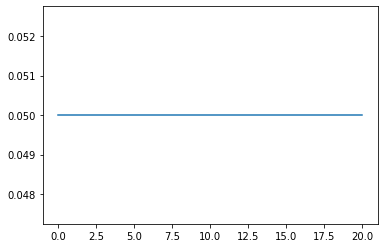

In [24]:
# (1)
a = 0
b = 20
x = np.linspace(a,b , 200)
y = [1/(b-a)] * 200
plt.plot(x, y)

# 
print("E[x] = (a + b) / 2")


*For solutions, see `solutions/uniform.py`*

### Computing Covariance

The Covariance between two variables, $X$ and $Y$, is denoted as $cov(X,Y)$ and can be computed using the Expected Values of $X$ and $Y$.

$cov(X,Y) = E[(X-E[X])(Y-E[Y])]$

This reduces to the form:

$cov(X,Y) = E[XY] - E[X]E[Y]$

(To do the reduction, note that $E[E[X]] = E[X]$)

In this form, it is easily computable. If you have sample data instead of the real underlying distribution, you can replace $E[X]$ with the value $\bar{X}$, $E[Y]$ with value $\bar{Y}$, and $E[XY]$ with the value $\bar{XY}$. This obtains an estimate for the covariance.

Using the NumPy library, we can compute (an estimate of) the covariance using the `np.cov` function:

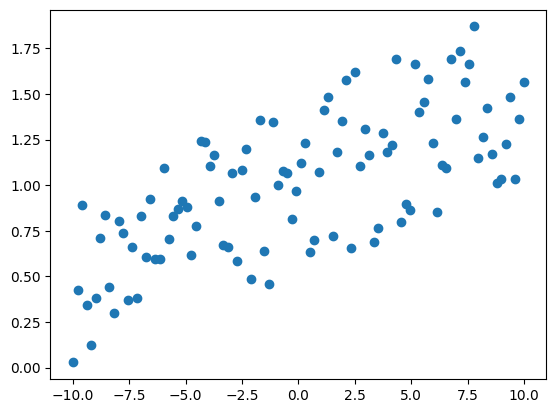

In [8]:
X = np.linspace(-10, 10, 100)
Y = np.random.random(100) + np.linspace(0, 1, 100)
plt.plot(X, Y, 'o')

In [9]:
C = np.cov(X, Y)
C

array([[34.35023637,  1.58097633],
       [ 1.58097633,  0.15120529]])

Wait, that's not one value! That is a covariance matrix, which includes the variance values on the diagonal. In this case, `C[0][0]` is the same as `np.var(X)`, because $cov(X, X) = var(X)$ (and similarly for $Y$):

In [16]:
np.var(X), np.var(Y)

(34.00673400673401, 0.1563957161127152)

Further, we can see from the results that $cov(X,Y) = cov(Y, X)$. You can confirm this by swapping $X$ and $Y$ in the covariance equation above.

#### Exercise

1. Create two sets of numbers that have a *negative correlation*
2. Create two sets of numbers that have approximately a *zero correlation*

In [53]:
# (1)
# For the solutions a regression is used. Haven't done OLS in Python yet, if I remember I'll come back to this.


# (2)
x = np.random.random(100) #+ np.linspace(0, 1, 100)
y = np.random.random(100)

correlation, p_value = stats.pearsonr(x, y)
print(correlation)

0.09361065179379917


*For solutions, see `solutions/correlations.py`*

### Dimensionality Analysis

In data, numbers are rarely in isolation - they normally have units associated with them. For instance, here are a bunch of heights and weights of 30 people:

In [11]:
heights = np.array([178.64530591, 173.06618977, 155.22558268, 186.8983648 ,
       149.16650972, 164.3049925 , 156.8397536 , 166.07190208,
       174.11183283, 155.54411733, 152.61490567, 182.89611452,
       145.79498225, 169.50606044, 157.94949789, 170.43628341,
       175.95694371, 178.09153374, 178.51960883, 173.56347301,
       158.79606688, 168.593175  , 159.88907252, 174.0085056 ,
       172.05981633, 175.79140631, 165.6368616 , 191.2270476 ,
       179.92045118, 153.1153195 ])

In [12]:
weights = np.array([ 88.39616195,  63.77670541,  82.1551606 , 102.81391498,
        54.11862754,  73.19813772,  87.89767135,  77.42374335,
        68.65163289,  81.00977302,  76.8384397 , 119.6155542 ,
        92.78823634,  73.24696289,  72.12448243,  87.41055872,
        88.22139197, 102.50923756,  83.48268745,  82.69144239,
        72.76970268,  96.6186149 ,  81.97160878,  85.20213248,
        95.62580765,  91.80510994,  67.09249674,  86.42500849,
        83.76262709,  71.82791366])

The covariance of these is strong (taller people tend to weigh more):

In [13]:
np.cov(heights, weights)[0][1]

73.26405232380192

That's a positive value, and we could compare this against a similar covariance, *only if the units match*. That is, our heights are in centimetres, and our weights are in kilograms, so our covariance has a **unit of cmkg**. We can only compare other covariances with the same unit.

Further, the unit cmkg has little meaning to most people and therefore the actual value of the covariance is hard to reason about. For contrast, take the standard deviation of the heights:

In [57]:
np.std(heights)  # Remembering that np.var(heights) will be in cm squared!

11.384729794575746

We can intuitively get an idea that lots of people will have heights "about 11cm from the mean", and one can easily picture that a good portion of the population lie within this 11cm radius around the mean, i.e. the boundary:

In [58]:
(np.mean(heights) - np.std(heights)), (np.mean(heights) + np.std(heights))

(156.75665944575758, 179.52611903490907)

However, we can not get a similar intuitive grasp on what it means to have a covariance of 73.2 cmkg, and it might actually be misleading to try and relate that to other known concepts.

It is for this reason that we usually use the correlation, which addresses this dimensionality problem. We will investigate the correlation in the next module.